In [36]:
from fipy import *
from fipy.tools import numerix
import matplotlib.pyplot as plt

In [37]:
R = 10.  ## teljes hossz, amire lefut a program
nx = 20  ## ennyi részre lesz felosztva
dr = R / nx
mesh = Grid1D(dx=dr, nx=nx)  ## új mesh nx számú dx széles lépésközzel

## diffúziós és konvekciós együtthatók
# diffCoeff = numerix.sin(mesh.x)
# convCoeff = (numerix.cos(mesh.x) ** 2, )  ## vektornak kell lennie
diffCoeff = 1.
convCoeff = [1.,]
sourceCoeff = 1.

## sugár és Jacobi bevezetése
# r = 0.
# J = 1.  ## kell egyáltalán?

## idő bevezetése
duration = Variable(10.)
dt = Variable(0.1)
t = Variable(0.)
imax = int((duration.value / dt.value) + 1)
i = 0
print(imax)

## határfeltételekhez adatok
valueLeft = 1.
gradLeft = (0.,)
valueRight = 0.

## "megoldási változó" - sűrűségfv
f = CellVariable(mesh=mesh, name="sűrűségfv", value=1.) # kezdeti feltétel az egész tartományra
f.setValue(10., where= mesh.x == R/2)

## határfeltételek érvényesítése
f.constrain(valueLeft, mesh.facesLeft)
f.faceGrad.constrain(gradLeft, where=mesh.facesLeft)
f.constrain(valueRight, mesh.facesRight)

101


2.503906269559874
4.675387559416962 

[2.50390627 4.67538756 5.81432067 6.33086427 6.47093294 6.38183138
 6.15179975 5.83378719 5.45970584 5.04895105 4.61347622 4.1608038
 3.69580451 3.22174458 2.74090055 2.25492008 1.76503483 1.27218779
 0.77711154 0.28037861]
[2.50390627 4.67538756 5.81432067 6.33086427 6.47093294 6.38183138
 6.15179975 5.83378719 5.45970584 5.04895105 4.61347622 4.1608038
 3.69580451 3.22174458 2.74090055 2.25492008 1.76503483 1.27218779
 0.77711154 0.28037861]


C:\ProgramData\Anaconda3\lib\site-packages\fipy\viewers\matplotlibViewer\__init__.py:120: UserWarning: Matplotlib1DViewer efficiency is improved by setting the 'datamax' and 'datamin' keys
  return Matplotlib1DViewer(vars=vars, title=title, axes=axes, **kwlimits)


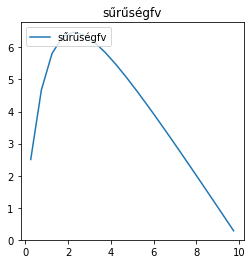

In [38]:
## az egyenlet alakja FiPy-ban az együtthatókkal
eq = (TransientTerm() == DiffusionTerm(coeff=diffCoeff)
      + PowerLawConvectionTerm(coeff=convCoeff)
      + sourceCoeff)

# solution1D = numerix.empty(imax, CellVariable)  # 1D üres numpy array
solution1D = []


while i != imax:
    eq.solve(var=f, solver=DummySolver(iterations=1), dt=dt)
    solution1D.append(f)
    # solution2D[i] = t.value
    # t.setValue = t.value + dt
    i += 1

print(f.value[0])
print(f.value[1], "\n")
print(solution1D[0].value)
print(solution1D[100].value)
viewer = Viewer(vars=f, datamin=0)



#viewer1 = Viewer(vars=solution2D[1])
#viewer2 = Viewer(vars=solution2D[99])